# DSCI 100 Project Proposal

## Introduction

## Preliminary Exploratory Data Analysis

First we read the data from the repository and import libraries 

In [199]:
library(repr)
library(tidyverse) 
library(tidymodels)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows

In [6]:
# un-comment to download the data
# download.file(url = "https://github.com/Oscar-Yik/dsci-100-project/blob/3af4ff02686b68be2b21e76b3c5c68ec408c329f/data/heart_disease/processed.cleveland.data", destfile = "data/heart_disease/processed.cleveland.data")
# download.file(url = "https://github.com/Oscar-Yik/dsci-100-project/blob/3af4ff02686b68be2b21e76b3c5c68ec408c329f/data/heart_disease/processed.hungarian.data", destfile = "data/heart_disease/processed.hungarian.data")
# download.file(url = "https://github.com/Oscar-Yik/dsci-100-project/blob/3af4ff02686b68be2b21e76b3c5c68ec408c329f/data/heart_disease/processed.switzerland.data", destfile = "data/heart_disease/processed.switzerland.data")
# download.file(url = "https://github.com/Oscar-Yik/dsci-100-project/blob/3af4ff02686b68be2b21e76b3c5c68ec408c329f/data/heart_disease/processed.va.data", destfile = "data/heart_disease/processed.va.data")

In [249]:
heart_disease_cols <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
heart_disease_C <- read_csv(file = "data/heart_disease/processed.cleveland.data", col_names = heart_disease_cols)
heart_disease_H <- read_csv(file = "data/heart_disease/processed.hungarian.data", col_names = heart_disease_cols)
heart_disease_S <- read_csv(file = "data/heart_disease/processed.switzerland.data", col_names = heart_disease_cols)
heart_disease_V <- read_csv(file = "data/heart_disease/processed.va.data", col_names = heart_disease_cols)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thal
dbl (5): age, sex, cp, oldpeak, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal
dbl (5): age, sex, cp, chol, num

ℹ Use `spec()` to retr

We want to get rid of missing values in the data so our models don't fail. Specifically we will replace them with the most frequent value.

In [250]:
find_most_frequent <- function(data, column, column_str) {
    result <- data |> 
        mutate(across(all_of(c({{ column_str }})), ~na_if(., "?"))) |> 
        filter(!is.na({{ column }})) |>
        group_by({{ column }}) |> 
        summarize(count = n()) |>
        slice_max(count,n=1) |> 
        pull({{ column }})
    return(result)
}

impute_feat <- function(data, column) {
    column_str = deparse(substitute(column))
    result <- data |>
        mutate(across(all_of(c({{ column_str }})), ~na_if(., "?"))) |> 
        mutate({{column}} := if_else(is.na({{column}}), find_most_frequent(data, {{column}}, {{column_str}}) , {{column}}))
    return(result)
}

impute_feat_special <- function(data, column) {
    column_str = deparse(substitute(column))
    result <- data |>
        mutate(across(all_of(c({{ column_str }})), ~na_if(., "?"))) |> 
        mutate({{column}} := if_else(is.na({{column}}), find_most_frequent(data, {{column}}, {{column_str}})[[1]] , {{column}}))
    return(result)
}

# imputation <- function(data) {
#     cc <- names(heart_disease_V)[map_lgl(heart_disease_V, is.character)]
#     # for (cname in cc) {
#     #     print(as.name(cname))
#     #     result <- impute_feat(data, as.name(cname))
#     # }
#     print(cc)
#     # result <- data |> 
#     #     # mutate(across(where(is.character), ~impute_feat(data, {{ .col }})))
#     #     mutate(across(where(is.character), ~test(data, {{ .col }})))
#     return(result)
# }
# heart_disease_V <- imputation(heart_disease_V)

heart_disease_C <- impute_feat(heart_disease_C, ca)
heart_disease_C <- impute_feat(heart_disease_C, thal)

heart_disease_H <- impute_feat(heart_disease_H, ca)
heart_disease_H <- impute_feat(heart_disease_H, thal)
heart_disease_H <- impute_feat(heart_disease_H, trestbps)
heart_disease_H <- impute_feat_special(heart_disease_H, chol)
heart_disease_H <- impute_feat(heart_disease_H, fbs)
heart_disease_H <- impute_feat(heart_disease_H, thalach)
heart_disease_H <- impute_feat(heart_disease_H, exang)
heart_disease_H <- impute_feat(heart_disease_H, restecg)
heart_disease_H <- impute_feat(heart_disease_H, slope)

heart_disease_S <- impute_feat(heart_disease_S, ca)
heart_disease_S <- impute_feat(heart_disease_S, thal)
heart_disease_S <- impute_feat(heart_disease_S, trestbps)
heart_disease_S <- impute_feat(heart_disease_S, fbs)
heart_disease_S <- impute_feat(heart_disease_S, thalach)
heart_disease_S <- impute_feat(heart_disease_S, exang)
heart_disease_S <- impute_feat(heart_disease_S, restecg)
heart_disease_S <- impute_feat(heart_disease_S, oldpeak)
heart_disease_S <- impute_feat(heart_disease_S, slope)

heart_disease_V <- impute_feat(heart_disease_V, ca)
heart_disease_V <- impute_feat(heart_disease_V, thal)
heart_disease_V <- impute_feat(heart_disease_V, trestbps)
heart_disease_V <- impute_feat(heart_disease_V, chol)
heart_disease_V <- impute_feat(heart_disease_V, fbs)
heart_disease_V <- impute_feat_special(heart_disease_V, thalach)
heart_disease_V <- impute_feat(heart_disease_V, exang)
heart_disease_V <- impute_feat(heart_disease_V, oldpeak)
heart_disease_V <- impute_feat(heart_disease_V, slope)
heart_disease_C
heart_disease_H
heart_disease_S
heart_disease_V

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,0.0,3.0,0


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
28,1,2,130,132,0,2,185,0,0,2,0,7,0
29,1,2,120,243,0,0,160,0,0,2,0,7,0
29,1,2,140,230,0,0,170,0,0,2,0,7,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,0,7,1
58,0,2,180,393,0,0,110,1,1,2,0,7,1
65,1,4,130,275,0,1,115,1,1,2,0,7,1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
32,1,1,95,0,0,0,127,0,.7,1,2,7,1
34,1,4,115,0,0,0,154,0,.2,1,2,7,1
35,1,4,115,0,0,0,130,1,0,2,2,7,3
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
72,1,3,160,0,0,2,114,0,1.6,2,2,7,0
73,0,3,160,0,0,1,121,0,0,1,2,3,1
74,1,2,145,0,0,1,123,0,1.3,1,2,7,1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
63,1,4,140,260,0,1,112,1,3,2,0,7,2
44,1,4,130,209,0,1,127,0,0,2,0,7,0
60,1,4,132,218,0,1,140,1,1.5,3,0,7,2
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,2,0,6,2
58,1,4,120,385,1,2,120,1,0,2,0,7,0
62,1,2,120,254,0,2,93,1,0,2,0,7,1


We need to correct the data types of the columns for both categorical and numeric features

In [251]:
# Factor: sex, cp, fbs, restecg, exang, slope, thal, num
correct_types <- function(data) {
    result <- data |> 
        mutate(sex = as_factor(sex)) |> 
        mutate(cp = as_factor(cp)) |> 
        mutate(fbs = as_factor(fbs)) |> 
        mutate(restecg = as_factor(restecg)) |> 
        mutate(exang = as_factor(exang)) |> 
        mutate(slope = as_factor(slope)) |>
        mutate(thal = as_factor(thal)) |> 
        mutate(ca = as.numeric(ca)) |>
        mutate(age = as.numeric(age)) |>
        mutate(trestbps = as.numeric(trestbps)) |>
        mutate(chol = as.numeric(chol)) |> 
        mutate(oldpeak = as.numeric(oldpeak))
    return(result)
}

heart_disease_C <- correct_types(heart_disease_C)
heart_disease_H <- correct_types(heart_disease_H)
heart_disease_S <- correct_types(heart_disease_S)
heart_disease_V <- correct_types(heart_disease_V)
heart_disease_C
heart_disease_H
heart_disease_S
heart_disease_V

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,0,3.0,0


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<chr>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
28,1,2,130,132,0,2,185,0,0,2,0,7,0
29,1,2,120,243,0,0,160,0,0,2,0,7,0
29,1,2,140,230,0,0,170,0,0,2,0,7,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,0,7,1
58,0,2,180,393,0,0,110,1,1,2,0,7,1
65,1,4,130,275,0,1,115,1,1,2,0,7,1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<chr>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
32,1,1,95,0,0,0,127,0,0.7,1,2,7,1
34,1,4,115,0,0,0,154,0,0.2,1,2,7,1
35,1,4,115,0,0,0,130,1,0.0,2,2,7,3
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
72,1,3,160,0,0,2,114,0,1.6,2,2,7,0
73,0,3,160,0,0,1,121,0,0.0,1,2,3,1
74,1,2,145,0,0,1,123,0,1.3,1,2,7,1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<chr>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
63,1,4,140,260,0,1,112,1,3.0,2,0,7,2
44,1,4,130,209,0,1,127,0,0.0,2,0,7,0
60,1,4,132,218,0,1,140,1,1.5,3,0,7,2
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,2,0,6,2
58,1,4,120,385,1,2,120,1,0,2,0,7,0
62,1,2,120,254,0,2,93,1,0,2,0,7,1


The target column should be renamed and fixed to be binary so it is easier to classify later on. We will group all numbers greater than 0 to be 1. 

In [252]:
convert_target <- function(data) {
    result <- data |>
        mutate(num = if_else(num > 0, 1, 0)) |>
        mutate(num = as.factor(num)) |>
        rename(not_healthy = num)
    return(result)
}

heart_disease_C <- convert_target(heart_disease_C)
heart_disease_H <- convert_target(heart_disease_H)
heart_disease_S <- convert_target(heart_disease_S)
heart_disease_V <- convert_target(heart_disease_V)
heart_disease_C
heart_disease_H
heart_disease_S
heart_disease_V

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,not_healthy
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3.0,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1,7.0,1
57,0,2,130,236,0,2,174,0,0.0,2,1,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,0,3.0,0


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,not_healthy
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<chr>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
28,1,2,130,132,0,2,185,0,0,2,0,7,0
29,1,2,120,243,0,0,160,0,0,2,0,7,0
29,1,2,140,230,0,0,170,0,0,2,0,7,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,0,7,1
58,0,2,180,393,0,0,110,1,1,2,0,7,1
65,1,4,130,275,0,1,115,1,1,2,0,7,1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,not_healthy
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<chr>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
32,1,1,95,0,0,0,127,0,0.7,1,2,7,1
34,1,4,115,0,0,0,154,0,0.2,1,2,7,1
35,1,4,115,0,0,0,130,1,0.0,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
72,1,3,160,0,0,2,114,0,1.6,2,2,7,0
73,0,3,160,0,0,1,121,0,0.0,1,2,3,1
74,1,2,145,0,0,1,123,0,1.3,1,2,7,1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,not_healthy
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<chr>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
63,1,4,140,260,0,1,112,1,3.0,2,0,7,1
44,1,4,130,209,0,1,127,0,0.0,2,0,7,0
60,1,4,132,218,0,1,140,1,1.5,3,0,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,2,0,6,1
58,1,4,120,385,1,2,120,1,0,2,0,7,0
62,1,2,120,254,0,2,93,1,0,2,0,7,1


With the prelimary data read and cleaned, we can split it into training and testing sets. For this project we will go with 30% training and 70% testing splits. 

In [254]:
heart_disease_C_split <- initial_split(heart_disease_C, prop = 0.3, strata = not_healthy)
heart_disease_C_train <- training(heart_disease_C_split)
heart_disease_C_test <- testing(heart_disease_C_split)

heart_disease_H_split <- initial_split(heart_disease_H, prop = 0.3, strata = not_healthy)
heart_disease_H_train <- training(heart_disease_H_split)
heart_disease_H_test <- testing(heart_disease_H_split)

heart_disease_S_split <- initial_split(heart_disease_S, prop = 0.3, strata = not_healthy)
heart_disease_S_train <- training(heart_disease_S_split)
heart_disease_S_test <- testing(heart_disease_S_split)

heart_disease_V_split <- initial_split(heart_disease_V, prop = 0.3, strata = not_healthy)
heart_disease_V_train <- training(heart_disease_V_split)
heart_disease_V_test <- testing(heart_disease_V_split)

In [255]:
glimpse(heart_disease_S_train)
glimpse(heart_disease_S_test)

Rows: 36
Columns: 14
$ age         <dbl> 38, 38, 40, 41, 47, 47, 47, 51, 51, 51, 52, 53, 53, 53, 55…
$ sex         <fct> 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ cp          <fct> 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4…
$ trestbps    <dbl> 110, 150, 95, 125, 110, 155, 160, 130, 130, 140, 130, 105,…
$ chol        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ fbs         <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ restecg     <fct> 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0…
$ thalach     <chr> "156", "120", "144", "176", "120", "118", "124", "170", "1…
$ exang       <fct> 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1…
$ oldpeak     <dbl> 0.0, 0.0, 0.0, 1.6, 0.0, 1.0, 0.0, -0.7, 0.0, 0.0, 0.0, 0.…
$ slope       <fct> 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 3, 2, 2, 3, 2, 1, 2…
$ ca          <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2…
$ thal        <fct>

To explore this data we can examine the number of observations for each class 

In [262]:
get_summary <- function(data, column) {
    result <- data |> 
        group_by(not_healthy) |> 
        summarize({{ column }} := n())
    return(result)
}

hd_summary_C <- get_summary(heart_disease_C_train, count_C)
hd_summary_H <- get_summary(heart_disease_H_train, count_H) |> select(count_H)
hd_summary_S <- get_summary(heart_disease_S_train, count_S) |> select(count_S)
hd_summary_V <- get_summary(heart_disease_V_train, count_V) |> select(count_V)

hd_summary_full <- bind_cols(hd_summary_C, hd_summary_H, hd_summary_S, hd_summary_V)
hd_summary_full 

not_healthy,count_C,count_H,count_S,count_V
<fct>,<int>,<int>,<int>,<int>
0,49,56,2,15
1,41,31,34,44


We can also examine the mean of all numeric columns 

In [263]:
numeric_cols <- c("ca", "age", "trestbps", "chol", "oldpeak")

get_mean <- function(data, name) {
    result <- data |> 
                select(all_of(numeric_cols)) |>
                map_df(mean) |> 
                pivot_longer(numeric_cols, names_to = "features", values_to = {{ name }})
    return(result)
}

hd_mean_C <- get_mean(heart_disease_C_train, "mean_C")
hd_mean_H <- get_mean(heart_disease_H_train, "mean_H") |> select("mean_H")
hd_mean_S <- get_mean(heart_disease_S_train, "mean_S") |> select("mean_S")
hd_mean_V <- get_mean(heart_disease_V_train, "mean_V") |> select("mean_V")

hd_mean_full <- bind_cols(hd_mean_C, hd_mean_H, hd_mean_S, hd_mean_V)
hd_mean_full

features,mean_C,mean_H,mean_S,mean_V
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ca,0.6222222,0.0000000,2.0000000,0.0000000
age,52.9333333,48.1494253,55.8055556,60.0847458
trestbps,128.3888889,135.5632184,130.8333333,130.0169492
chol,250.2000000,245.2988506,0.0000000,173.7288136
oldpeak,0.9977778,0.5344828,0.7694444,0.9881356


We can also find the most popular category for the categorical features 

In [265]:
categorical_cols <- c("sex", "cp", "fbs",	"restecg", "thalach", "exang", "slope",	"thal",	"not_healthy")
find_most_popular <- function(column) {
    freq_table <- table(column) 
    result <- names(freq_table)[which.max(freq_table)]
    return(result)
}

get_modes <- function(data, name) {
    result <- select(data, all_of(categorical_cols)) |>
        map_df(find_most_popular) |> 
        pivot_longer(categorical_cols, names_to = "features", values_to = {{ name }})
    return(result)
}
hd_mode_C <- get_modes(heart_disease_C_train, "mode_C") 
hd_mode_H <- get_modes(heart_disease_H_train, "mode_H") |> select(mode_H)
hd_mode_S <- get_modes(heart_disease_S_train, "mode_S") |> select(mode_S)
hd_mode_V <- get_modes(heart_disease_V_train, "mode_V") |> select(mode_V)

hd_mode_full <- bind_cols(hd_mode_C, hd_mode_H, hd_mode_S, hd_mode_V)
hd_mode_full

features,mode_C,mode_H,mode_S,mode_V
<chr>,<chr>,<chr>,<chr>,<chr>
sex,1,1,1,1
cp,4,2,4,4
fbs,0,0,0,0
⋮,⋮,⋮,⋮,⋮
slope,1,2,2,2
thal,3.0,7,7,7
not_healthy,0,0,1,1


We can visualize each feature to see how much contribute to the target class

`summarise()` has grouped output by 'thal'. You can override using the
`.groups` argument.


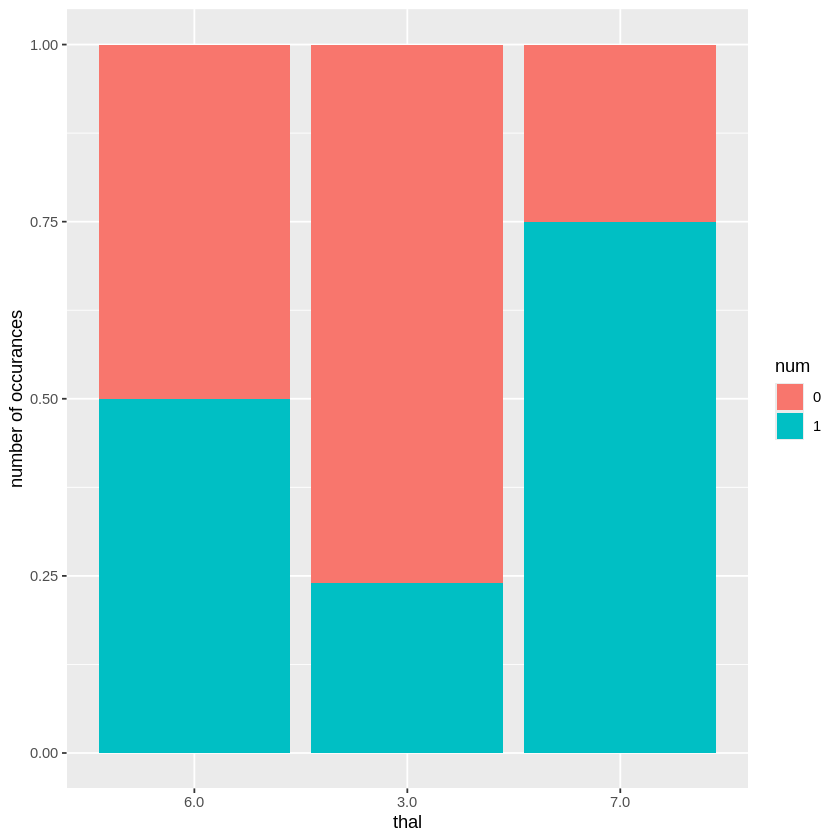

In [270]:
thal_C <- heart_disease_C_train |>
    select(thal, not_healthy) |> 
    group_by(thal, not_healthy) |>
    summarize(count = n()) 

categorical_plot <- thal_C |>
    ggplot(aes(x = thal, y = count, fill = not_healthy)) +
    geom_bar(stat = "identity", position = "fill") + 
    labs(x = "thal", y = "number of occurances", fill = "num")
categorical_plot

## Methods

## Expected Outcomes and Significant